# D209: Data Mining I - Task 2
#### Scott Sullivan | 01054753 | June 17, 2023

## Part I: Research Question
### A1. Summary Question
For this paper, the author will create a model to predict the classification of which customers have a higher probability of churning. The model will be based on attributes from the provided dataset (of customer churn). The author chose to train the model using the **Random Forest** classifier functionality in the python Scikit-learn framework.

### A2. Goals
As a result, the current analysis will be to build a model with the capability of predicting the probability of a current customer dropping the service (churning). This model will drive a data driven course of action for any stakeholders involved with this aspect of customer retention.

## Part II: Method Justification
### B1. Classification Analysis
The author chose the creation of a Random Forest classification model for this task. The Random Forest classifier works by creating multiple decision trees. Each of these trees will generate a predcition and each tree in this 'forest' then votes on which of the classes this specific input shoult be classifed. The **expected outcome** (and final output) is the aggregated predictions of all the trees of that classification of the dependent variable. In this case, whether a customer will churn. 

### B2. Assumptions
Because of the random breakdown into individual trees, the Randon Forest classifyer assumes (in fact, relies) that our sampling data is representative, since it is learning from patterns. This means that the dataset should represent an adequate range of possible values of data.

### B3. Libraries Used
For our data cleaning, model creation, and analysis, the author will use python, Scikit-learn (and Pandas). Pandas will mostly be used as part of the data cleaning and exploration. The majority of the Random Forest classification will be handled by Scikit-learn. 

Scikit-learn was chosen for its large community as well as the documentation. The fact that it has a built in Random Forest classifier simply adds to its strength. It will be written and analyzed in Jupyter Notebook. 

## Part III: Data Prep
### C1. Preprocessing Goal
One goal for preprocessing that is required for analyzing our 'Churn' data will be to take any binary "Yes-No" as well as any "True-False" attributes to and convert them to a numerical 1-0 representation. In addition, attributes with multi-categorical values (like that of InternetService) will be modified also. To do this, since they cannot be directly transformed to a 1 or 0, we must use One Hot Encoding. This will take each of the categorical values and convert them to their own column and given a 1 or 0. To prevent the accidental multicollinearity, we will only use k-1 of those attributes (dropping one of the options). 

Finally, we will conduct all of our normal data cleaning procedures. This will include dropping any non-useful attributes (columns like customer UUID or CaseNumber). We will also check for null values, duplicates, or any outliers contained in our datasets. 

#### CSV Import
To begin, the data is imported with pandas into our Jupyter Notebook and a duplicated dataframe is created in case we need to access any of the original data. Any transformations will be done on the main "df" dataframe from this point forward.

In [1]:
import numpy as np
import pandas as pd

# Read CSV File (the defaul null value is redefined to prevent 'None' as being classified as null) 
nan_values = ['nan', 'NaN', '']
csv_path = '_data/churn_clean.csv'
df = pd.read_csv(csv_path, keep_default_na=False, na_values=nan_values)
df_backupdf = df
df.head(1)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,...,172.455519,904.53611,5,5,5,3,4,4,3,4


In [2]:
unused_cols = ['UID', 'CaseOrder', 'Customer_id', 'Interaction', 'Population', 'Job', 'TimeZone',
                   'City', 'State', 'Zip', 'County', 'Area', 'Marital', 'Lat', 'Lng']
for item in df.columns:
    if item in unused_cols:
        df.drop(item, axis=1, inplace=True)
        print(f"{item} dropped | ", end='')

CaseOrder dropped | Customer_id dropped | Interaction dropped | UID dropped | City dropped | State dropped | County dropped | Zip dropped | Lat dropped | Lng dropped | Population dropped | Area dropped | TimeZone dropped | Job dropped | Marital dropped | 

#### Numerical Encoding of Binary Attributes
Here, the binary options of Yes/No as well as True/False are replaced with an int64 value of 1 or 0, respectively, in order to conduct the analysis later since we will not be able to analzye them as string values.

In [3]:
binary_list = ['Techie', 'Phone','Tablet', 'Churn','Port_modem','Multiple',
               'OnlineSecurity','DeviceProtection','OnlineBackup',
                'PaperlessBilling','StreamingTV','TechSupport','StreamingMovies']
for binaryString in binary_list:
    df[binaryString] = df[binaryString].replace({"True": 1, "False": 0, "Yes": 1, "No": 0})
    df[binaryString] = df[binaryString].astype(np.int64)
    print(f"Converted: {binaryString} | ", end='')
df.head(1)

Converted: Techie | Converted: Phone | Converted: Tablet | Converted: Churn | Converted: Port_modem | Converted: Multiple | Converted: OnlineSecurity | Converted: DeviceProtection | Converted: OnlineBackup | Converted: PaperlessBilling | Converted: StreamingTV | Converted: TechSupport | Converted: StreamingMovies | 

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,0,68,28561.99,Male,0,7.978323,10,0,1,0,...,172.455519,904.53611,5,5,5,3,4,4,3,4


#### Check for Duplicates
Now that we have converted the columns to a usable format, it is time conduct the checks for duplicates, nulls, and outliers. We begin with looking for duplicates.

In [4]:
dup_total = len(df) - len(df.duplicated())
print(f"Total Duplicates: {dup_total} found in our list of {len(df)} total entries.\n")

Total Duplicates: 0 found in our list of 10000 total entries.



#### Check for Null Values
Pandas has a standard _isnull()_ function that we wil use to check if any of the values in our dataframe have null values. It will use the null value definition we created during import. A value of 0 in the data below will signify that there are no null values in that attribute.

In [5]:
istrue = 1
for col in df.columns:
    if df[col].isnull().any():
        print(f"Null found in {col} | ",end='')   
        istrue = 0
if istrue == 1:
    print("No null values found.")

No null values found.


#### Check for Outliers
In order to find outliers, the author will print out an array of histograms to visually see if there are any outliers within normal distributions (the term "normal" is said generally here, this is meant to include right-skewed distributions and bi-modal distributions).

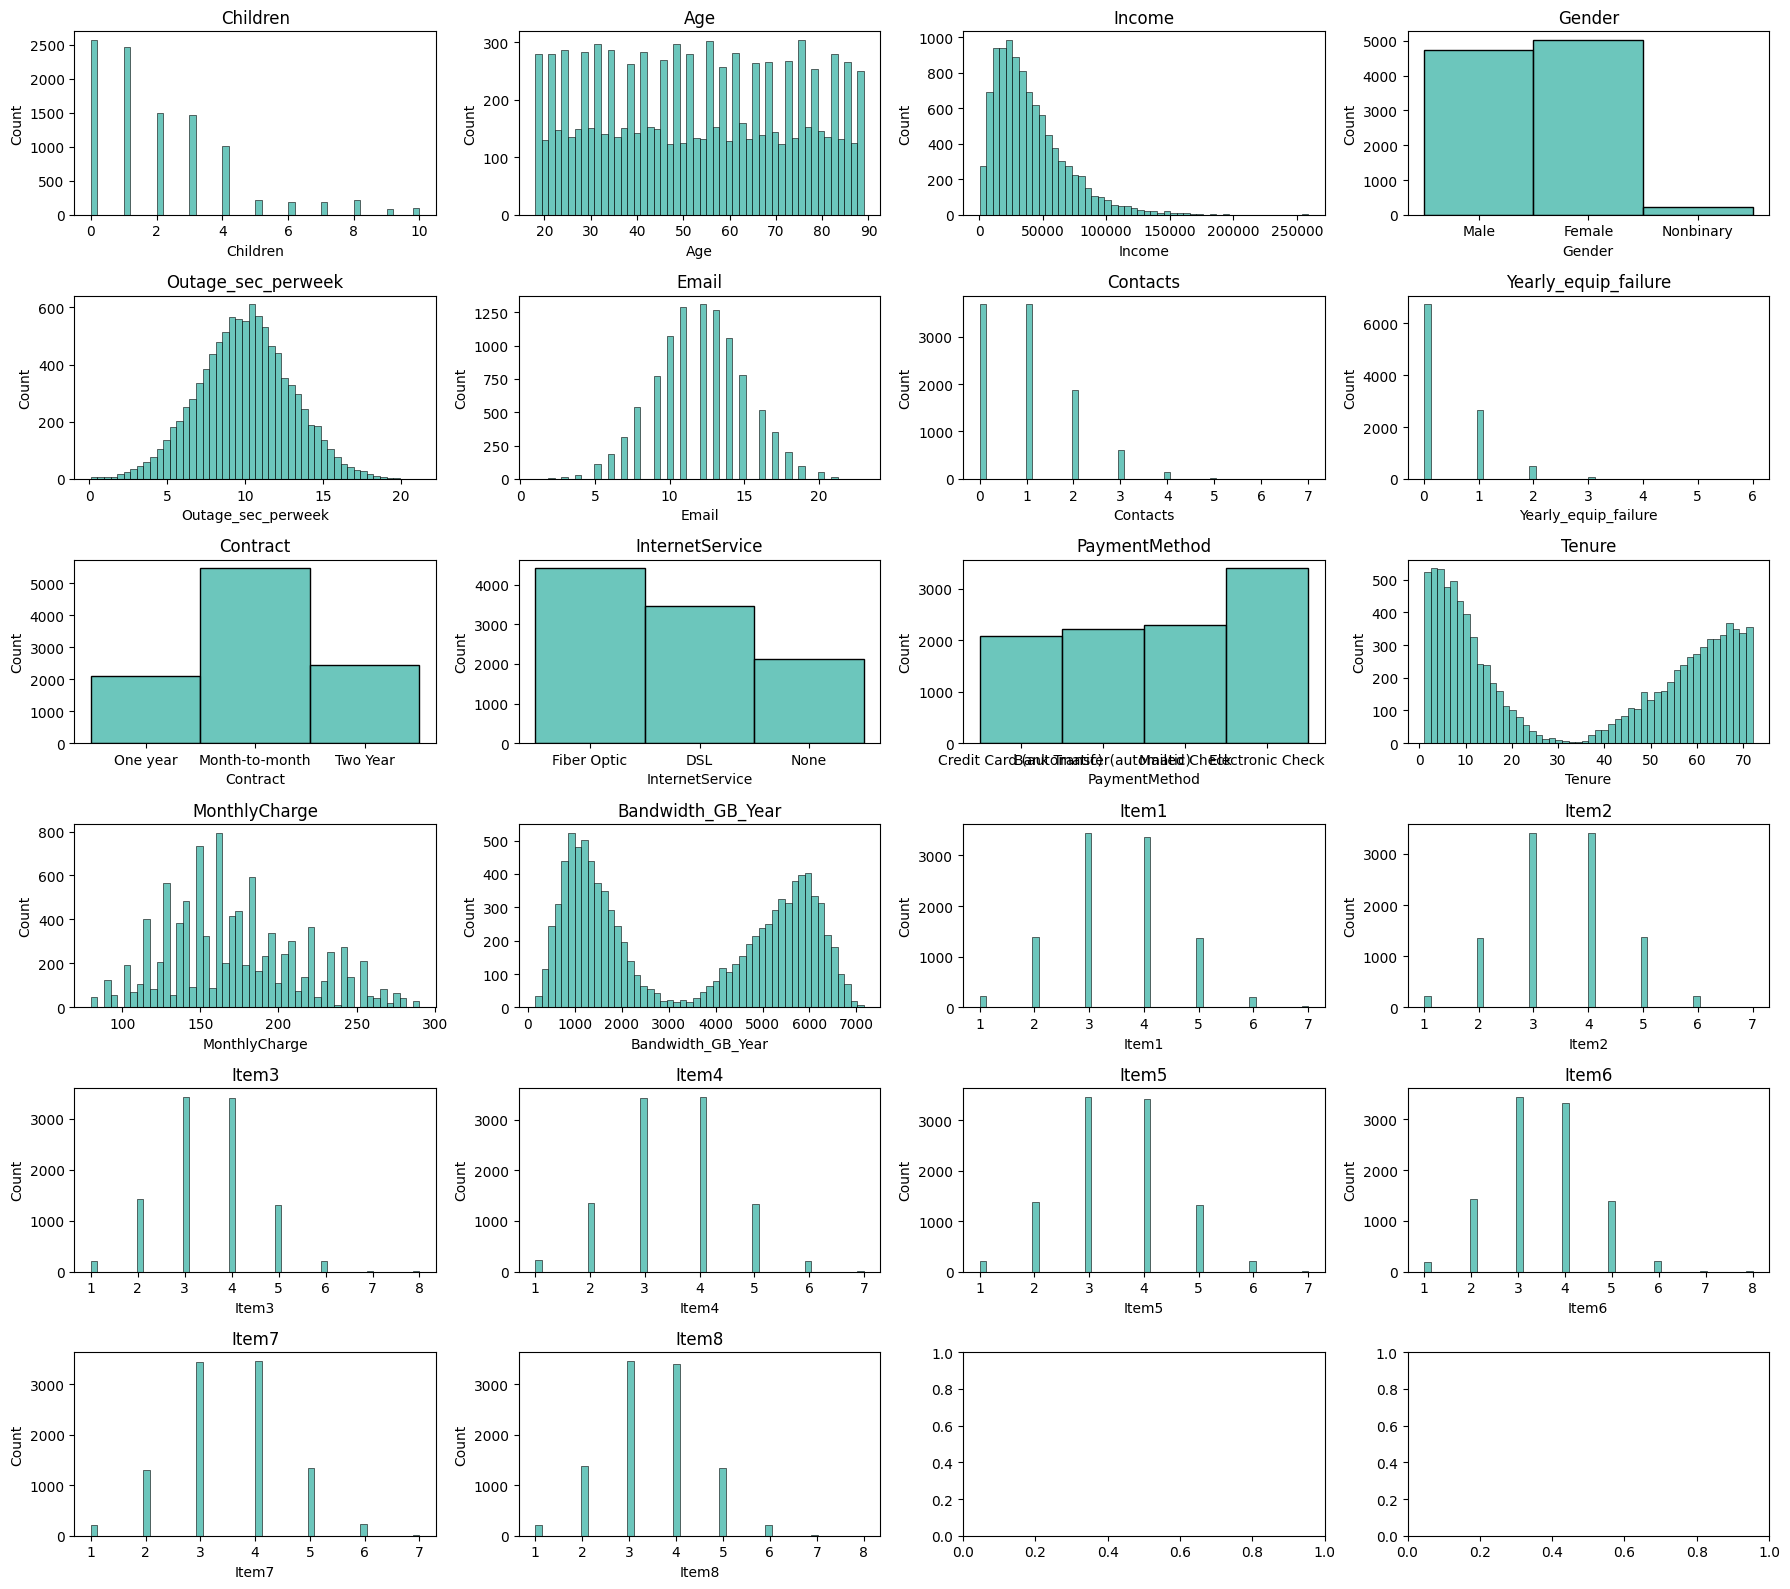

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
outlier_check_df = pd.DataFrame()
for attribute_col in df.columns:
    if attribute_col not in binary_list:
        outlier_check_df[attribute_col] = df[attribute_col]
        
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(18,16))
for ax, att in zip(axs.flatten(), outlier_check_df):
    sns.histplot(data=df, x=att, bins=50, color='#3bb3a6', ax=ax)
    ax.set_title(att)
    ax.set_xlabel(att)
plt.tight_layout()
plt.show()

#### Rename Attributes to More Logical Ones
In the original dataframe, there were eight 'Item' columns. Here we rename them to more logical attribute names. The names we will rename them to come from the data dictionary provided as part of the class project.

In [7]:
rename_list = {'Item1':'TimelyResponse', 'Item2':'TimelyFixes','Item3':'TimelyReplacements',
                  'Item4':'Reliability','Item7':'Courteous','Item5':'Options',
                  'Item6':'Respectful','Item8':'ActiveListening'}
df = df.rename(columns=rename_list)
print('Renamed Item Attributes')

Renamed Item Attributes


#### One Hot Encoding
As mentioned above, the categorical attributes that have more than two values will be converted to numerical ones. This is accomplished via One Hot Encoding, and by default, we will also drop one of the values in order to prevent multicollinearity.

In [8]:
one_hot_list = ['InternetService', 'Contract', 'PaymentMethod', 'Gender']
for attribute_item in one_hot_list:
    if attribute_item in df.columns:
        # Added astype to convert from boolean to numerical
        y = pd.get_dummies(df[attribute_item], prefix=attribute_item, drop_first=True).astype(np.int64)
        df.drop(attribute_item, axis=1, inplace=True)
        df = pd.concat([df, y], axis="columns")
print(df.head(1))

   Children  Age    Income  Churn  Outage_sec_perweek  Email  Contacts  \
0         0   68  28561.99      0            7.978323     10         0   

   Yearly_equip_failure  Techie  Port_modem  ...  ActiveListening  \
0                     1       0           1  ...                4   

   InternetService_Fiber Optic  InternetService_None  Contract_One year  \
0                            1                     0                  1   

   Contract_Two Year  PaymentMethod_Credit Card (automatic)  \
0                  0                                      1   

   PaymentMethod_Electronic Check  PaymentMethod_Mailed Check  Gender_Male  \
0                               0                           0            1   

   Gender_Nonbinary  
0                 0  

[1 rows x 40 columns]


### C2. Initial Variables For Analysis
Our dataset origianally had 50 attributes. After importing and cleaning, these are all the Continuous and Categorical attributes that are used in the current analysis. One note is that 'Churn,' our dependent variable, is _not_ listed among the independent variables listed by the author below, but it is a categorical attribute.

#### Continuous Attributes:
* Children, Age, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge, and Bandwith_GB_Year

#### Categorical Attributes
* Techie, Phone, Tablet, Port_moden, Multple, DeviceProtection, OnlineSecurity, OnlineBackup, StreamingMovies, StreamingTV, PaperlessBilling, TechSupport
#### Categorical Attributes (transformed via one hot encoding)
* InternetService, Contract, PaymentMethod, Gender
#### Categorical Attributes (renamed above)
* Item 1, Item 2, Item 3, Item 4, Item 5, Item 6, Item 7, Item 8

### C3. Data Preparation
The data has been cleaned and prepared by the author in the preceding sections in preparation for our data analysis. Specifically, for each of the phases, the author conducted the following steps:
- The author **imported the data** and each of the prerequisite python frameworks
- All unneeded attributes (ie. CustomerID, Lat, Lng) **were dropped**
- All categorical values were **transformed** into numerical ones
    - The binary values (Yes/no and True/false) were encoded to 1/0
    - The remaining categorical variables were encoded with the one hot encoding method (including dropping one column to adhere to the k-1 encoding
- The author then **checked for duplicates, missing data, and outliers**
- Finally, we **renamed** each of the generic attributes in order to be more descriptive

### C4. Export Cleaned Data
The newly cleaned dataframe is now exported into a CSV text file using the built in pandas export feature. 

In [9]:
export_filename = '_data/d209_churn_task_2_cleaned.csv'
df.to_csv(export_filename, index=False)
print(f"Cleaned data has been exported to {export_filename}")

Cleaned data has been exported to _data/d209_churn_task_2_cleaned.csv


## Part IV: Analysis
### D1. Training / Testing Splitting of Data
The author will proceed to split all of the data into a training set as well as a testing set. For this analysis, the training set will be set to 70% of the data and the testing set, 30%. This is accomplished using Scikit-learn's _train_test_split()_ built-in method. At the same time, we will import the required sklearn Random Forest frameworks.

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=3
)

In [11]:
# Export Training and Testing Datasets to CSV
export_Xtrain = '_data/d209_t2_Xtrain_data.csv'
export_ytrain = '_data/d209_t2_ytrain_data.csv'
export_Xtest = '_data/d209_t2_Xtest_data.csv'
export_ytest = '_data/d209_t2_ytest_data.csv'

X_tr.to_csv(export_Xtrain, index=False)
y_tr.to_csv(export_ytrain, index=False)
X_te.to_csv(export_Xtest, index=False)
y_te.to_csv(export_ytest, index=False)

print("Exported 2 training and 2 testing CSV files.")

Exported 2 training and 2 testing CSV files.


### D2. Description of the Analysis
We will create a Random Forest classifier model from the training data using Scikit-learn. To do so, the author began with the training set created above (the variables named X_tr and y_tr) and proceeded to fit the model using scikit-learn.

The author found that setting the number of trees in the classifier to 100 was a good tradeoff between having too large and small a segmentation while not sacfificing the accuracy of the model. All of the code used to accomplish this, including the RFC training is provided in the next section.

### D3. Perform Classification Analysis

Here, we created the Random Forest classifier, trained it, and the proceeded to run an evauation on the model to determine the accuracy of the model. 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Trees in forest:
number_of_trees = 100
rfc_model = RandomForestClassifier(n_estimators=number_of_trees, random_state=3) 
rfc_model.fit(X_tr, y_tr)

y_pred = rfc_model.predict(X_te)

In [13]:
# Random Forest model evaluation
print(f"Accuracy: {accuracy_score(y_te, y_pred)}\n")
print(classification_report(y_te, y_pred))

Accuracy: 0.884

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2214
           1       0.81      0.72      0.77       786

    accuracy                           0.88      3000
   macro avg       0.86      0.83      0.84      3000
weighted avg       0.88      0.88      0.88      3000



In [14]:
# Use model for predictions on test data
feature_names = X.columns.tolist()
X_te_df = pd.DataFrame(X_te, columns=feature_names)

test_preds = rfc_model.predict(X_te_df)
print(test_preds)

[0 0 0 ... 0 0 0]


## Part V: Data Summary
### E1. Accuracy and Mean Squared Error
The accuracy and the Mean Squared Error are presented for this section. First, we determine the accuracy, which is done by finding the fraction of correctly predicted values divided by the total values. For a model with higher accuracy, we can deduce that the model's predictions will be generally correct. 

The mean squared error (or MSE) is more commonly used for continuous values, but will be calculated here. Similar to accuracy, it is a statistical measurement that determines how well the model predicts the outcome of an event. A smaller MSE value means that the prediction is closer to the true values.

In [15]:
from sklearn.metrics import accuracy_score, mean_squared_error

# Random Forest model evaluation
print(f"Accuracy: {accuracy_score(y_te, y_pred)}\n")
print(classification_report(y_te, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_te, test_preds))

Accuracy: 0.884

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2214
           1       0.81      0.72      0.77       786

    accuracy                           0.88      3000
   macro avg       0.86      0.83      0.84      3000
weighted avg       0.88      0.88      0.88      3000

Mean Squared Error (MSE): 0.116


### E2. Results and implications of the analysis
The **results** that the author found from the Random Forest classification model found the accuracy to be 88.4% and is of high quality in determining the probability of a customer churning. Therefore, **the implication** is that we can feel confident in taking direct, actionable steps at this point to lower the company's churn by using this model in order to target specific customers that the model finds to have a probability of leaving the company.

### E3. Limitation of this data analysis
One of the most significant limitation in the eyes of the author is that we did not explore deeper into the data to uncover if the predictions of the model are impacted by any interdependencies that are unknown among any of our attributes. Having interdependencies could negatively affect the model's predictions by giving more bias and weight to those factors.

A way around this would be to dig into the data and analyze it to find any correlations via a creating a correlation matrix. One example would be age and income. If they both played a role in the model's prediction of churn, and it was later discovered that age and income are correlated (ie. an individual typically gets paid more as they get older), then having both attributes as part of the model's training could sway our results.

### E4. Recommendations
The author, upon creating the Random Forest model and examinign the accuracy of the model, would recommend that the stakeholders deploy this model into production. They can have it running continuously, looking for customers that have a high likelihood of leaving (churning). The company's analytics department would alert the sales and marketing team with the list of customers with this high probability of churning. The marketers (or sales team) could contact the customers via an email campaign to give them an incentive to sign up for an annual contract, which may be a way to raise the retention for the customer. 

## Part VI: Demonstration

### F.  Panopto video
Below is a link to the Panopto video of the author demonstrating the code (and a full summary of the coding environment) are included in this video. 
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=74cb4cc0-328d-4392-acaa-b0240137c108


### G. Web Sources

- Molina, Eden. _"A Practical Guide to Implementing a Random Forest Classifier in Python"_.  https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263

- Glen, Stephanie. _"Comparing Classifiers: Decision Trees, K-NN & Naive Bayes"_. https://www.datasciencecentral.com/comparing-classifiers-decision-trees-knn-naive-bayes/

- Ebner, Joshua. _"A Quick Introduction to the Sklearn Fit Method"_. https://www.sharpsightlabs.com/blog/sklearn-fit/ 


### H. Other Sources
- Kawerk, Elie. _"Machine Learning with Tree-Based Models in Python"_.  https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/bagging-and-random-forests